### ✅ Task 1: Create Map Graph with 20 Segments
This section sets up the environment with 13 points and 20 path segments.

C:\Users\SHILPA\AppData\Local\Temp\ipykernel_15680\1102597920.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


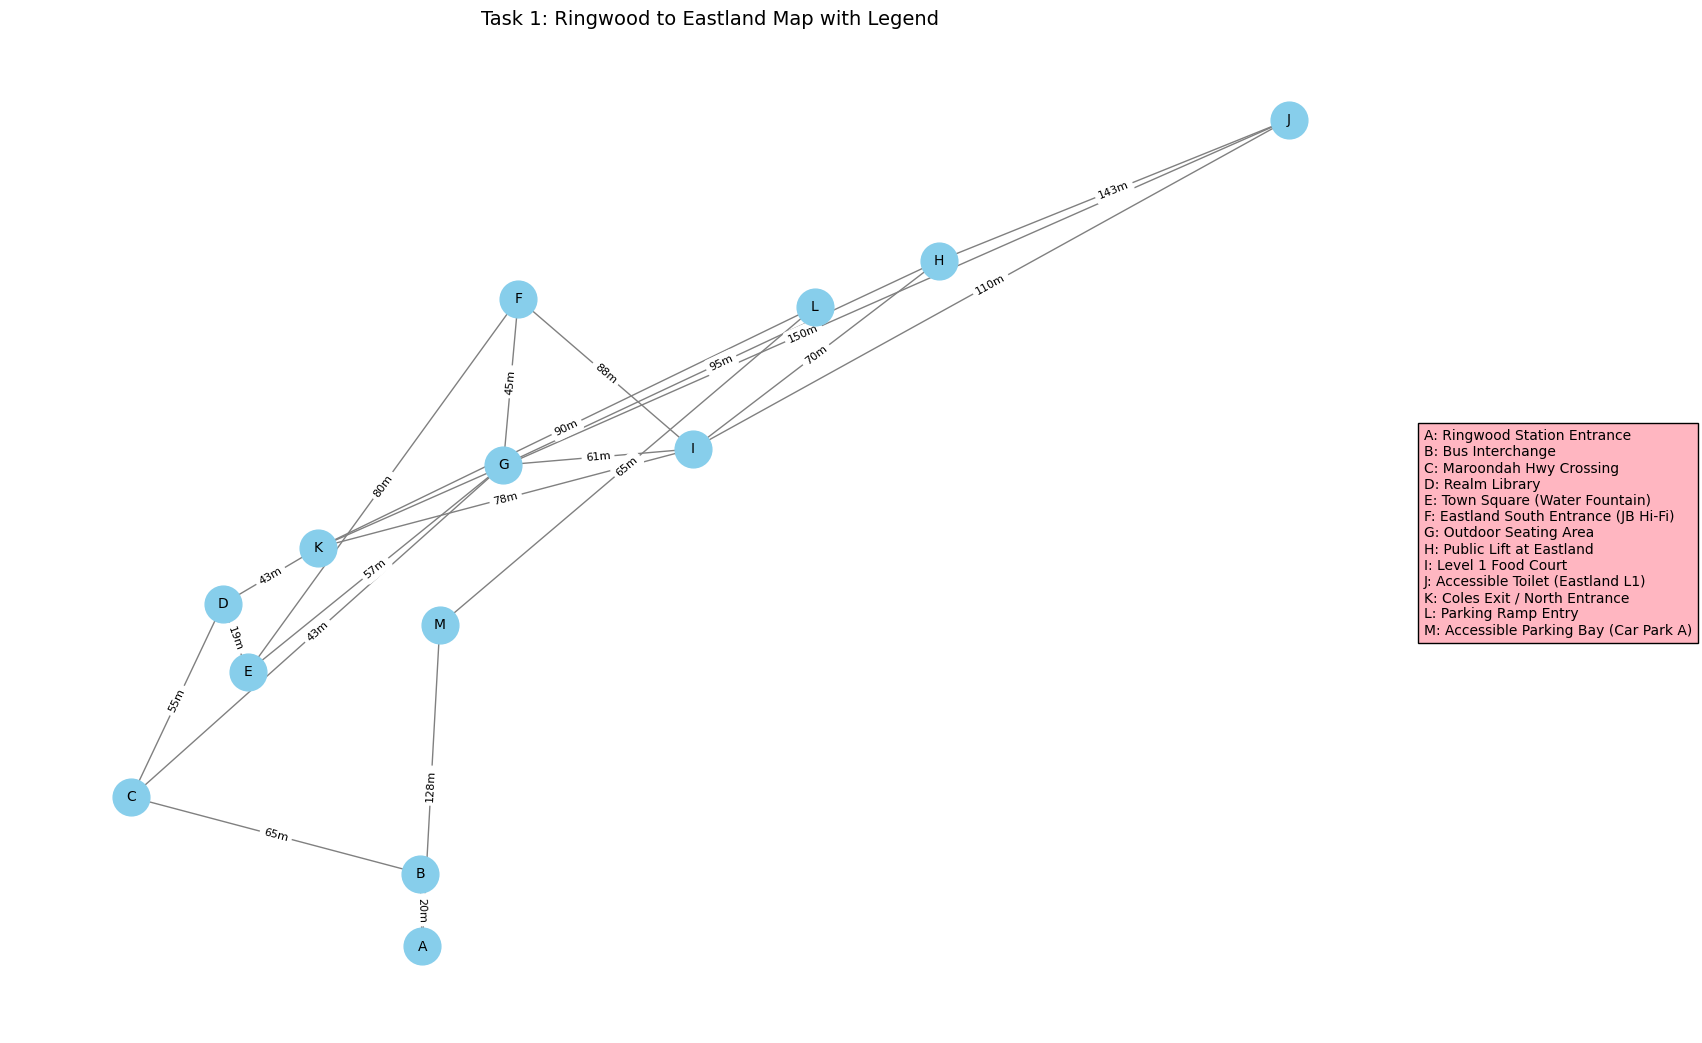

In [1]:
#import necessary libraries after reset
import networkx as nx
import matplotlib.pyplot as plt

# Define points and segments 
points = {
    'A': (-37.8156505, 145.2294636), 'B': (-37.815474, 145.2294588), 'C': (-37.8152886, 145.2288074),
    'D': (-37.8148201, 145.2290135), 'E': (-37.8149849, 145.2290695), 'F': (-37.8140786, 145.2296805),
    'G': (-37.8144825, 145.2296467), 'H': (-37.8139861, 145.2306309), 'I': (-37.8144433, 145.2300744),
    'J': (-37.8136444, 145.2314192), 'K': (-37.814683, 145.2292295), 'L': (-37.8140991, 145.2303492),
    'M': (-37.8148709, 145.2295034)
}

segments = [
    ('A', 'B', 20), ('B', 'C', 65), ('C', 'D', 55), ('D', 'E', 19), ('E', 'F', 80),
    ('F', 'G', 45), ('G', 'H', 95), ('H', 'I', 70), ('I', 'J', 110), ('J', 'K', 150),
    ('K', 'L', 90), ('L', 'M', 65), ('M', 'A', 128), ('D', 'K', 43), ('C', 'G', 43),
    ('E', 'G', 57), ('G', 'I', 61), ('F', 'I', 88), ('K', 'I', 78), ('H', 'J', 143)
]

point_descriptions = {
    'A': "Ringwood Station Entrance",
    'B': "Bus Interchange",
    'C': "Maroondah Hwy Crossing",
    'D': "Realm Library",
    'E': "Town Square (Water Fountain)",
    'F': "Eastland South Entrance (JB Hi-Fi)",
    'G': "Outdoor Seating Area",
    'H': "Public Lift at Eastland",
    'I': "Level 1 Food Court",
    'J': "Accessible Toilet (Eastland L1)",
    'K': "Coles Exit / North Entrance",
    'L': "Parking Ramp Entry",
    'M': "Accessible Parking Bay (Car Park A)"
}

# Create the graph
G_task1 = nx.Graph()
for point, (lat, lon) in points.items():
    G_task1.add_node(point, pos=(lon, lat))
for u, v, dist in segments:
    G_task1.add_edge(u, v, weight=dist)

# Plotting
plt.figure(figsize=(14, 10))
pos = nx.get_node_attributes(G_task1, 'pos')

# Draw the network
nx.draw(G_task1, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=10, edge_color='gray')
nx.draw_networkx_edge_labels(G_task1, pos, edge_labels={(u, v): f"{d}m" for u, v, d in segments}, font_size=8)

# Create a legend on the right
legend_text = '\n'.join([f"{k}: {v}" for k, v in point_descriptions.items()])
plt.text(1.01, 0.5, legend_text, transform=plt.gca().transAxes,
         fontsize=10, va='center', bbox=dict(facecolor='LIGHTPINK', edgecolor='black'))

plt.title("Task 1: Ringwood to Eastland Map with Legend", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


### ADJENCY MATRIX 

In [4]:
# Create adjacency matrix (distance matrix) for G_task1
adj_matrix = nx.to_pandas_adjacency(G_task1, weight='weight')

# Display as a DataFrame for clear labeling
adj_matrix.fillna(0, inplace=True)  # replace NaN with 0 for non-connected nodes
adj_matrix = adj_matrix.astype(int)  # convert distances to integers

from IPython.display import display

display(adj_matrix)


,A,B,C,D,E,F,G,H,I,J,K,L,M
A,0,20,0,0,0,0,0,0,0,0,0,0,128
B,20,0,65,0,0,0,0,0,0,0,0,0,0
C,0,65,0,55,0,0,43,0,0,0,0,0,0
D,0,0,55,0,19,0,0,0,0,0,43,0,0
E,0,0,0,19,0,80,57,0,0,0,0,0,0
F,0,0,0,0,80,0,45,0,88,0,0,0,0
G,0,0,43,0,57,45,0,95,61,0,0,0,0
H,0,0,0,0,0,0,95,0,70,143,0,0,0
I,0,0,0,0,0,88,61,70,0,110,78,0,0
J,0,0,0,0,0,0,0,143,110,0,150,0,0


# TASK 2 

### HEURISTIC

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import math
# --- Step 4: Define Euclidean Heuristic Function ---
def euclidean_heuristic(a, b):
    ax, ay = points[a][1], points[a][0]
    bx, by = points[b][1], points[b][0]
    return math.hypot(bx - ax, by - ay) * 100000  # Approximate meters

### A * ALGORITHM 

In [11]:
# --- Step 5: A* Algorithm Function ---
def a_star(graph, start, goal):
    open_set = [(0 + euclidean_heuristic(start, goal), 0, start, [])]
    visited = set()

    while open_set:
        f, g, current, path = open_set.pop(0)
        if current in visited:
            continue
        visited.add(current)
        path = path + [current]
        if current == goal:
            return path, g

        for neighbor in graph.neighbors(current):
            weight = graph[current][neighbor]['weight']
            if neighbor not in visited:
                new_g = g + weight
                new_f = new_g + euclidean_heuristic(neighbor, goal)
                open_set.append((new_f, new_g, neighbor, path))
        open_set.sort()
    return None, float('inf')


# --- Step 6: Function to print path and distance ---
def print_astar_path(graph, start, goal):
    path, distance = a_star(graph, start, goal)
    if path:
        print(f"Path from {start} to {goal}: {' → '.join(path)}")
        print(f"Total Distance: {distance:.2f} meters\n")
    else:
        print(f"No path found from {start} to {goal}\n")

# --- Step 7: Test different start and end points ---
print_astar_path(G_task1, 'C', 'L')
print_astar_path(G_task1, 'F', 'K')
print_astar_path(G_task1, 'M', 'H')
print_astar_path(G_task1, 'A' , 'J')
print_astar_path (G_task1, 'B' , 'I')
                 

Path from C to L: C → D → K → L
Total Distance: 188.00 meters

Path from F to K: F → E → D → K
Total Distance: 142.00 meters

Path from M to H: M → L → K → I → H
Total Distance: 303.00 meters

Path from A to J: A → B → C → G → I → J
Total Distance: 299.00 meters

Path from B to I: B → C → G → I
Total Distance: 169.00 meters



### ADJENCY MATRIX

In [14]:
import pandas as pd
from IPython.display import display

# Define the test cases (you already run these in Step 7)
astar_test_cases = [('C', 'L'), ('F', 'K'), ('M', 'H'), ('A', 'J'), ('B', 'I')]

# Run A* for each pair and store the results
astar_results = []
for start, end in astar_test_cases:
    path, distance = a_star(G_task1, start, end)
    path_letters = ' → '.join(path)
    path_full_names = ' → '.join(point_descriptions[p] for p in path)

    astar_results.append({
        'Start': point_descriptions[start],
        'End': point_descriptions[end],
        'Shortest Path (IDs)': path_letters,
        'Shortest Path (Full Names)': path_full_names,
        'Total Distance (m)': round(distance, 2)
    })

# Create and display the DataFrame
astar_df_named = pd.DataFrame(astar_results)
display(astar_df_named)


,Start,End,Shortest Path (IDs),Shortest Path (Full Names),Total Distance (m)
0,Maroondah Hwy Crossing,Parking Ramp Entry,C → D → K → L,Maroondah Hwy Crossing → Realm Library → Coles...,188
1,Eastland South Entrance (JB Hi-Fi),Coles Exit / North Entrance,F → E → D → K,Eastland South Entrance (JB Hi-Fi) → Town Squa...,142
2,Accessible Parking Bay (Car Park A),Public Lift at Eastland,M → L → K → I → H,Accessible Parking Bay (Car Park A) → Parking ...,303
3,Ringwood Station Entrance,Accessible Toilet (Eastland L1),A → B → C → G → I → J,Ringwood Station Entrance → Bus Interchange → ...,299
4,Bus Interchange,Level 1 Food Court,B → C → G → I,Bus Interchange → Maroondah Hwy Crossing → Out...,169


### ✅ Task 3.1: Expand Environment to 30 Segments
10 more path segments are added to the original 20 to make a total of 30.

In [23]:

# Define 10 Additional Segments
new_segments = [('A', 'D', 72), ('B', 'E', 78), ('C', 'E', 60), ('D', 'F', 84), ('G', 'J', 135), ('H', 'K', 122), ('I', 'M', 75), ('J', 'L', 80), ('F', 'L', 105), ('A', 'G', 80)]

# Task 3.2: Assign constraints to segments in G_task3
constraints = ['none', 'slope', 'none', 'obstacle', 'slope', 'kerb_ramp', 'obstacle', 'slope', 'kerb_ramp', 'none', 'slope', 'kerb_ramp', 'none', 'none', 'slope', 'obstacle', 'kerb_ramp', 'slope', 'none', 'none', 'obstacle', 'kerb_ramp', 'slope', 'none', 'obstacle', 'none', 'kerb_ramp', 'slope', 'none', 'kerb_ramp']
all_segments = [('A', 'B', 20), ('B', 'C', 65), ('C', 'D', 55), ('D', 'E', 19), ('E', 'F', 80), ('F', 'G', 45), ('G', 'H', 95), ('H', 'I', 70), ('I', 'J', 110), ('J', 'K', 150), ('K', 'L', 90), ('L', 'M', 65), ('M', 'A', 128), ('D', 'K', 43), ('C', 'G', 43), ('E', 'G', 57), ('G', 'I', 61), ('F', 'I', 88), ('K', 'I', 78), ('H', 'J', 143), ('A', 'D', 72), ('B', 'E', 78), ('C', 'E', 60), ('D', 'F', 84), ('G', 'J', 135), ('H', 'K', 122), ('I', 'M', 75), ('J', 'L', 80), ('F', 'L', 105), ('A', 'G', 80)]
segment_with_constraints = list(zip(all_segments, constraints))
G_task3 = nx.Graph()
for point, (lat, lon) in points.items():
    G_task3.add_node(point, pos=(lon, lat))
for u, v, dist in all_segments:
    G_task3.add_edge(u, v, weight=dist)
for ((u, v, dist), constraint) in segment_with_constraints:
    G_task3[u][v]['constraint'] = constraint
print("Task 3 Segment Count:", len(G_task3.edges))

# Print example segment with constraint
for u, v in list(G_task3.edges):
    print(f"Segment {u}-{v}: Distance={G_task3[u][v]['weight']}m, Constraint={G_task3[u][v]['constraint']}")



Task 3 Segment Count: 30
Segment A-B: Distance=20m, Constraint=none
Segment A-M: Distance=128m, Constraint=none
Segment A-D: Distance=72m, Constraint=obstacle
Segment A-G: Distance=80m, Constraint=kerb_ramp
Segment B-C: Distance=65m, Constraint=slope
Segment B-E: Distance=78m, Constraint=kerb_ramp
Segment C-D: Distance=55m, Constraint=none
Segment C-G: Distance=43m, Constraint=slope
Segment C-E: Distance=60m, Constraint=slope
Segment D-E: Distance=19m, Constraint=obstacle
Segment D-K: Distance=43m, Constraint=none
Segment D-F: Distance=84m, Constraint=none
Segment E-F: Distance=80m, Constraint=slope
Segment E-G: Distance=57m, Constraint=obstacle
Segment F-G: Distance=45m, Constraint=kerb_ramp
Segment F-I: Distance=88m, Constraint=slope
Segment F-L: Distance=105m, Constraint=none
Segment G-H: Distance=95m, Constraint=obstacle
Segment G-I: Distance=61m, Constraint=kerb_ramp
Segment G-J: Distance=135m, Constraint=obstacle
Segment H-I: Distance=70m, Constraint=slope
Segment H-J: Distance=1

### graph with 30 segments

C:\Users\SHILPA\AppData\Local\Temp\ipykernel_15680\3057778836.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


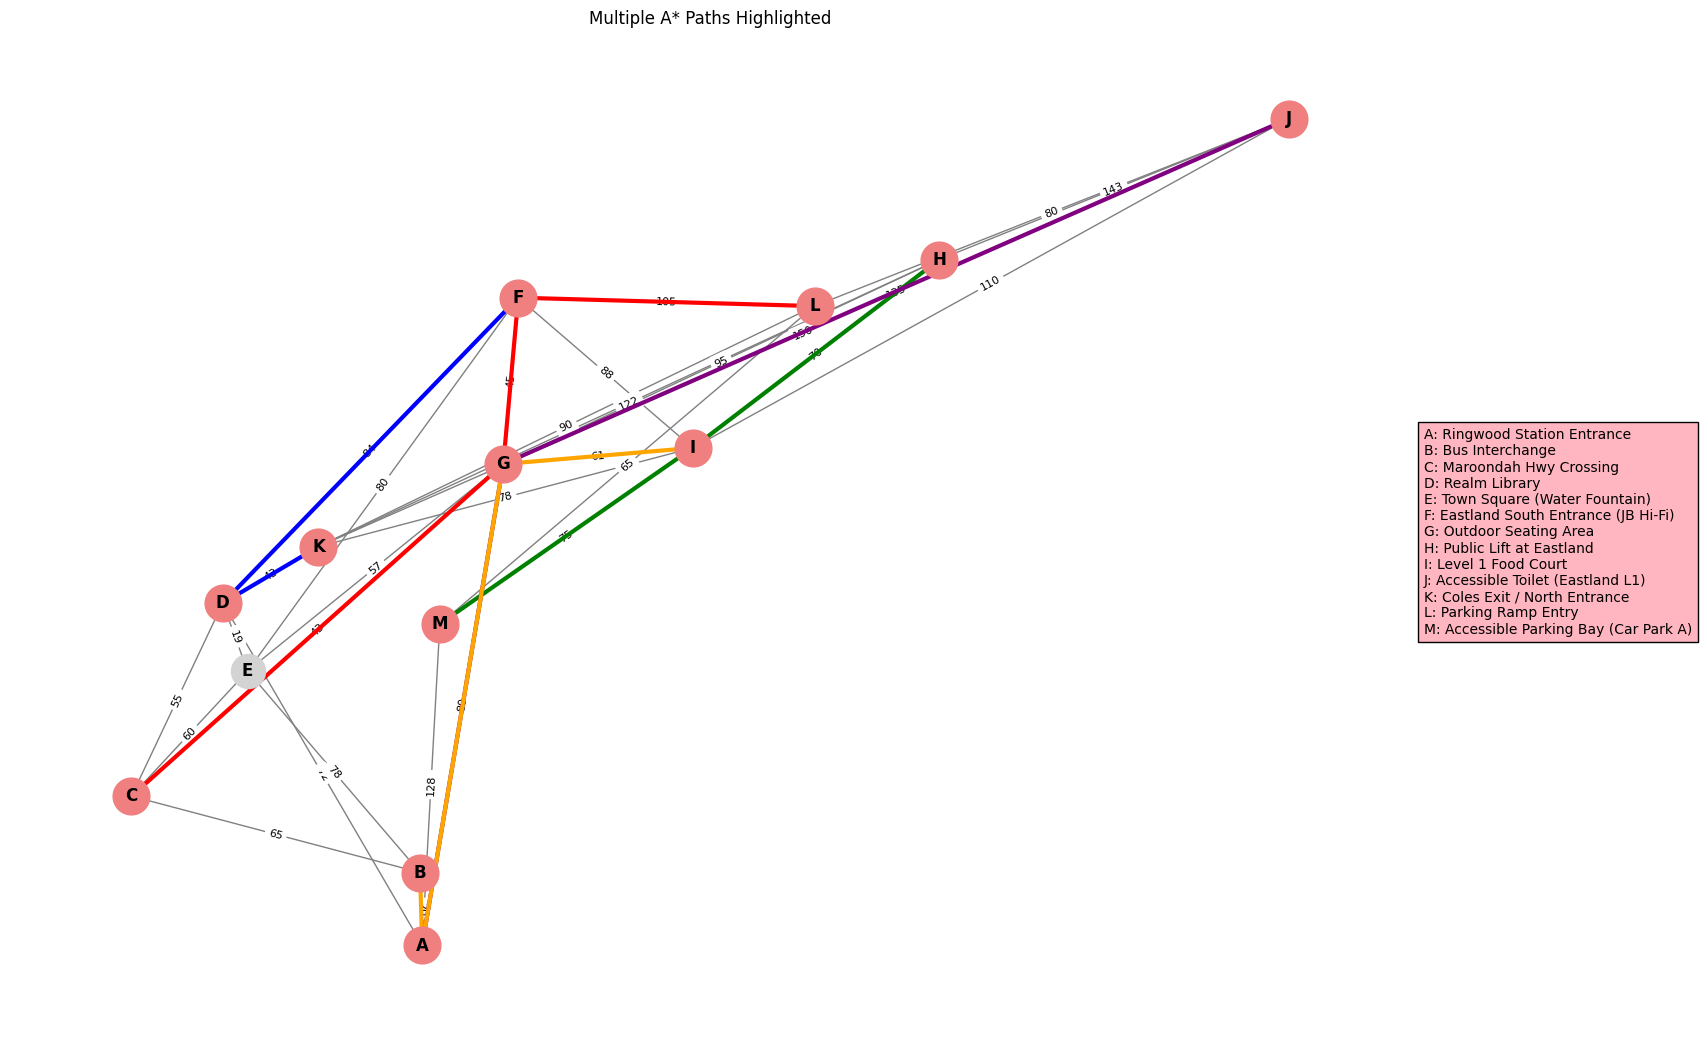

In [26]:
# Step 1: Compute multiple paths
paths_info = [
    ('C', 'L', 'red'),
    ('F', 'K', 'blue'),
    ('M', 'H', 'green'),
    ('A', 'J', 'purple'),
    ('B', 'I', 'orange')
]

# Step 2: Plot the graph
plt.figure(figsize=(14, 10))
pos = nx.get_node_attributes(G_task3, 'pos')
nx.draw(G_task3, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=600, font_weight='bold')
nx.draw_networkx_edge_labels(G_task3, pos, edge_labels=nx.get_edge_attributes(G_task3, 'weight'), font_size=8)

# Step 3: Draw each A* path with a different color
for start, end, color in paths_info:
    path, cost = a_star(G_task3, start, end)
    edge_path = list(zip(path[:-1], path[1:]))
    nx.draw_networkx_edges(G_task3, pos, edgelist=edge_path, edge_color=color, width=3, label=f"{start}→{end} ({cost:.0f}m)")

# Step 4: Highlight all path nodes
highlighted_nodes = set()
for start, end, _ in paths_info:
    path, _ = a_star(G_task3, start, end)
    highlighted_nodes.update(path)
nx.draw_networkx_nodes(G_task3, pos, nodelist=list(highlighted_nodes), node_color='lightcoral', node_size=700)

# Step 5: Add legend and title
legend_text = '\n'.join([f"{k}: {v}" for k, v in point_descriptions.items()])
plt.text(1.01, 0.5, legend_text, transform=plt.gca().transAxes,
         fontsize=10, va='center', bbox=dict(facecolor='lightpink', edgecolor='black'))

plt.title("Multiple A* Paths Highlighted")
plt.axis("off")
plt.tight_layout()
plt.show()


### ADDED NEW HEURISTIC

In [29]:

constraint_penalty = {
    'none': 0,
    'kerb_ramp': 15,
    'slope': 20,
    'obstacle': 50
}
def euclidean_heuristic(a, b):
    ax, ay = points[a][1], points[a][0]
    bx, by = points[b][1], points[b][0]
    return math.hypot(bx - ax, by - ay) * 100000  # Approximate meters
    
def constraint_aware_heuristic(current, goal):
    base = euclidean_heuristic(current, goal)
    penalties = []
    for neighbor in G_task3.neighbors(current):
        constraint = G_task3[current][neighbor].get('constraint', 'none')
        penalties.append(constraint_penalty.get(constraint, 0))
    avg_penalty = sum(penalties) / len(penalties) if penalties else 0
    return base * avg_penalty
    

def a_star(graph, start, goal, heuristic_func):
    open_set = [(0 + heuristic_func(start, goal), 0, start, [])]
    visited = set()
    expanded = 0

    while open_set:
        f, g, current, path = open_set.pop(0)
        if current in visited:
            continue
        visited.add(current)
        expanded += 1
        path = path + [current]
        if current == goal:
            return path, g, expanded

        if heuristic_func==constraint_aware_heuristic:
            for neighbor in graph.neighbors(current):
                weight = graph[current][neighbor]['weight']
                constraint = graph[current][neighbor].get('constraint', 'none')
                cost = weight + constraint_penalty.get(constraint, 0)
                if neighbor not in visited:
                    new_g = g + cost
                    new_f = new_g + heuristic_func(neighbor, goal)
                    open_set.append((new_f, new_g, neighbor, path))
        else:
            for neighbor in graph.neighbors(current):
                weight = graph[current][neighbor]['weight']
                if neighbor not in visited:
                    new_g = g + weight
                    new_f = new_g + euclidean_heuristic(neighbor, goal)
                    open_set.append((new_f, new_g, neighbor, path))

        
        open_set.sort()
    return None, float('inf'), expanded

def compare_heuristics(start, goal):
    std_path, std_cost, nodes_expanded = a_star(G_task3, start, goal, euclidean_heuristic)
    con_path, con_cost, nodes_expanded1 = a_star(G_task3, start, goal, constraint_aware_heuristic)

    print(f"🔄 {start} to {goal}")
    print(f"Standard A* Path: {' → '.join(std_path)} | Cost: {round(std_cost, 2)} | Nodes: {nodes_expanded}")
    print(f"Constraint-Aware A* Path: {' → '.join(con_path)} | Cost: {round(con_cost, 2)} | Nodes: {nodes_expanded1}\n")

# Test comparisons
compare_heuristics('A', 'J')
compare_heuristics('F', 'K')
compare_heuristics('C', 'L')
compare_heuristics('M', 'H')
compare_heuristics('B', 'I')


🔄 A to J
Standard A* Path: A → G → J | Cost: 215 | Nodes: 3
Constraint-Aware A* Path: A → M → L → J | Cost: 308 | Nodes: 4

🔄 F to K
Standard A* Path: F → D → K | Cost: 127 | Nodes: 5
Constraint-Aware A* Path: F → D → K | Cost: 127 | Nodes: 3

🔄 C to L
Standard A* Path: C → G → F → L | Cost: 193 | Nodes: 6
Constraint-Aware A* Path: C → G → I → K → L | Cost: 327 | Nodes: 7

🔄 M to H
Standard A* Path: M → I → H | Cost: 145 | Nodes: 4
Constraint-Aware A* Path: M → L → K → H | Cost: 312 | Nodes: 4

🔄 B to I
Standard A* Path: B → A → G → I | Cost: 161 | Nodes: 4
Constraint-Aware A* Path: B → A → M → I | Cost: 238 | Nodes: 4



In [ ]:
# Re-import necessary libraries after reset
import networkx as nx
import matplotlib.pyplot as plt
import math

# Redefine points and segments
points = {
    'A': (-37.8156505, 145.2294636), 'B': (-37.815474, 145.2294588), 'C': (-37.8152886, 145.2288074),
    'D': (-37.8148201, 145.2290135), 'E': (-37.8149849, 145.2290695), 'F': (-37.8140786, 145.2296805),
    'G': (-37.8144825, 145.2296467), 'H': (-37.8139861, 145.2306309), 'I': (-37.8144433, 145.2300744),
    'J': (-37.8136444, 145.2314192), 'K': (-37.814683, 145.2292295), 'L': (-37.8140991, 145.2303492),
    'M': (-37.8148709, 145.2295034)
}

segments = [
    ('A', 'B', 10), ('B', 'C', 65), ('C', 'D', 55), ('D', 'E', 19), ('E', 'F', 80),
    ('F', 'G', 45), ('G', 'H', 95), ('H', 'I', 70), ('I', 'J', 110), ('J', 'K', 150),
    ('K', 'L', 90), ('L', 'M', 65), ('M', 'A', 128), ('D', 'K', 43), ('C', 'G', 43),
    ('E', 'G', 57), ('G', 'I', 61), ('F', 'I', 88), ('K', 'I', 78), ('H', 'J', 143),
    ('A', 'D', 72), ('B', 'E', 78), ('C', 'E', 60), ('D', 'F', 84), ('G', 'J', 135),
    ('H', 'K', 122), ('I', 'M', 75), ('J', 'L', 80), ('F', 'L', 105), ('A', 'G', 90)
]

constraints = [
    'none', 'slope', 'none', 'obstacle', 'slope', 'kerb_ramp', 'obstacle', 'slope', 'kerb_ramp', 'none',
    'slope', 'kerb_ramp', 'none', 'none', 'slope', 'obstacle', 'kerb_ramp', 'slope', 'none', 'none',
    'obstacle', 'kerb_ramp', 'slope', 'none', 'obstacle', 'none', 'kerb_ramp', 'slope', 'none', 'kerb_ramp'
]

# Recreate graph
G_task3 = nx.Graph()
for node, (lat, lon) in points.items():
    G_task3.add_node(node, pos=(lon, lat))
for (u, v, dist), constraint in zip(segments, constraints):
    G_task3.add_edge(u, v, weight=dist, constraint=constraint)

# Heuristics and penalty
constraint_penalty = {'none': 0, 'kerb_ramp': 15, 'slope': 20, 'obstacle': 50}

def euclidean_heuristic(a, b):
    ax, ay = points[a][1], points[a][0]
    bx, by = points[b][1], points[b][0]
    return math.hypot(bx - ax, by - ay) * 100000

def constraint_aware_heuristic(current, goal):
    base = euclidean_heuristic(current, goal)
    penalties = []
    for neighbor in G_task3.neighbors(current):
        constraint = G_task3[current][neighbor].get('constraint', 'none')
        penalties.append(constraint_penalty.get(constraint, 0))
    avg_penalty = sum(penalties) / len(penalties) if penalties else 0
    return base * avg_penalty

# A* function
def a_star(graph, start, goal, heuristic_func):
    open_set = [(0 + heuristic_func(start, goal), 0, start, [])]
    visited = set()
    expanded = 0
    while open_set:
        f, g, current, path = open_set.pop(0)
        if current in visited:
            continue
        visited.add(current)
        expanded += 1
        path = path + [current]
        if current == goal:
            return path, g, expanded
        if heuristic_func == constraint_aware_heuristic:
            for neighbor in graph.neighbors(current):
                weight = graph[current][neighbor]['weight']
                constraint = graph[current][neighbor].get('constraint', 'none')
                cost = weight + constraint_penalty.get(constraint, 0)
                if neighbor not in visited:
                    new_g = g + cost
                    new_f = new_g + heuristic_func(neighbor, goal)
                    open_set.append((new_f, new_g, neighbor, path))
        else:
            for neighbor in graph.neighbors(current):
                weight = graph[current][neighbor]['weight']
                if neighbor not in visited:
                    new_g = g + weight
                    new_f = new_g + heuristic_func(neighbor, goal)
                    open_set.append((new_f, new_g, neighbor, path))
        open_set.sort()
    return None, float('inf'), expanded

# Draw paths for all test cases
test_cases = [('A', 'J'), ('F', 'K'), ('C', 'L'), ('M', 'H'), ('B', 'I')]
for start, goal in test_cases:
    path, cost, _ = a_star(G_task3, start, goal, constraint_aware_heuristic)
    path_edges = list(zip(path[:-1], path[1:]))

    plt.figure(figsize=(10, 7))
    pos = nx.get_node_attributes(G_task3, 'pos')
    nx.draw(G_task3, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=600, font_weight='bold')
    nx.draw_networkx_edge_labels(G_task3, pos, edge_labels=nx.get_edge_attributes(G_task3, 'weight'), font_size=8)
    nx.draw_networkx_edges(G_task3, pos, edgelist=path_edges, edge_color='orange', width=3)
    nx.draw_networkx_nodes(G_task3, pos, nodelist=path, node_color='lightcoral', node_size=700)
    plt.title(f"Constraint-Aware A* Path from {start} to {goal}\nPath: {' → '.join(path)}\nTotal Cost: {cost:.2f}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


# task 4

In [ ]:
import heapq
def dijkstra_with_expansion(graph, start, goal):
    queue = [(0, start, [])]
    visited = set()
    expanded = 0
    while queue:
        cost, current, path = heapq.heappop(queue)
        if current in visited:
            continue
        visited.add(current)
        expanded += 1
        path = path + [current]
        if current == goal:
            return path, cost, expanded
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                edge_weight = graph[current][neighbor]['weight']
                constraint = graph[current][neighbor]['constraint']
                penalty = constraint_penalty[constraint]
                total_cost = cost + edge_weight + penalty
                heapq.heappush(queue, (total_cost, neighbor, path))
    return None, float('inf'), expanded
test_cases = [('A', 'J'), ('B', 'I'), ('F', 'K'), ('C', 'L'), ('M', 'H')]

for start, goal in test_cases:
    dj_path, dj_cost, dj_exp = dijkstra_with_expansion(G_task3, start, goal)
    as_path, as_cost, as_exp = a_star(G_task3, start, goal, euclidean_heuristic)
    ca_path, ca_cost, ca_exp = a_star(G_task3, start, goal, constraint_aware_heuristic)

    print(f"\n🔍 Pathfinding Comparison from {start} to {goal}")
    print(f"Dijkstra:              {' → '.join(dj_path)} | Cost: {round(dj_cost, 2)} | Nodes Expanded: {dj_exp}")
    print(f"A* (Euclidean):        {' → '.join(as_path)} | Cost: {round(as_cost, 2)} | Nodes Expanded: {as_exp}")
    print(f"A* (Constraint-Aware): {' → '.join(ca_path)} | Cost: {round(ca_cost, 2)} | Nodes Expanded: {ca_exp}")

# # Run all algorithms
# dj_path, dj_cost, dj_exp = dijkstra_with_expansion(G_task3, 'A', 'J')
# as_path, as_cost, as_exp = a_star(G_task3, 'A', 'J', euclidean_heuristic)
# ca_path, ca_cost, ca_exp = a_star(G_task3, 'A', 'J', constraint_aware_heuristic)
# ,
# dj_path, dj_cost, dj_exp = dijkstra_with_expansion(G_task3, 'B', 'I')
# as_path, as_cost, as_exp = a_star(G_task3, 'B', 'I', euclidean_heuristic)
# ca_path, ca_cost, ca_exp = a_star(G_task3, 'B', 'I', constraint_aware_heuristic)

# # Output results
# print("🔍 Pathfinding Comparison from A to J\n")
# print(f"Dijkstra:              {dj_path} | Cost: {round(dj_cost, 2)} | Nodes Expanded: {dj_exp}")
# print(f"A* (Euclidean):        {as_path} | Cost: {round(as_cost, 2)} | Nodes Expanded: {as_exp}")
# print(f"A* (Constraint-Aware): {ca_path} | Cost: {round(ca_cost, 2)} | Nodes Expanded: {ca_exp}")

# print("🔍 Pathfinding Comparison from B to I\n")
# print(f"Dijkstra:              {dj_path} | Cost: {round(dj_cost, 2)} | Nodes Expanded: {dj_exp}")
# print(f"A* (Euclidean):        {as_path} | Cost: {round(as_cost, 2)} | Nodes Expanded: {as_exp}")
# print(f"A* (Constraint-Aware): {ca_path} | Cost: {round(ca_cost, 2)} | Nodes Expanded: {ca_exp}")


